#### Kelompok 1 P19:
 1. Leo pratama 1915016169 (ketua)
 2. Asrofi  1915016154
 3. Rachmat ragil iskandar  1915026046

#### Pembagian tugas Kelompok 1 P19:
 1. Leo pratama (Data Preporcessing)
 2. Asrofi  (Data Collecting)
 3. Rachmat ragil iskandar  (Data Modeling)

## NLP Deteksi Stress


In [1]:
import pandas as pd # untuk manipullasi data
import numpy as np # Untuk membantu dalam analisa data 
import matplotlib.pyplot as plt # untuk membuat vislluaisasi
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk # untuk membantu kita dalam bekerja dengan teks
import re # untuk berbagai jenis manipulasi string

## Data Collecting

In [30]:
data = pd.read_csv("stress.csv")
data.head(5)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [3]:
data1 = data.drop(columns=['id','confidence',	'social_timestamp',	'social_karma','subreddit','post_id','sentence_range','syntax_ari','lex_dal_min_pleasantness','lex_dal_min_activation','lex_dal_min_imagery','lex_dal_avg_activation','lex_dal_avg_imagery','lex_dal_avg_pleasantness','social_upvote_ratio','social_num_comments','syntax_fk_grade','sentiment', 'lex_liwc_WC','lex_liwc_Analytic','lex_liwc_Clout','lex_liwc_Authentic','lex_liwc_Tone','lex_liwc_QMark','lex_liwc_Exclam','lex_liwc_Dash','lex_liwc_Quote','lex_liwc_Apostro','lex_liwc_Parenth','lex_liwc_OtherP','lex_dal_max_pleasantness','lex_dal_max_activation','lex_dal_max_imagery','lex_liwc_WPS','lex_liwc_Sixltr','lex_liwc_Dic','lex_liwc_function','lex_liwc_pronoun','lex_liwc_swear','lex_liwc_netspeak','lex_liwc_assent','lex_liwc_nonflu','lex_liwc_filler','lex_liwc_AllPunc','lex_liwc_Period','lex_liwc_Comma','lex_liwc_Colon','lex_liwc_SemiC',
'syntax_ari','lex_liwc_WC','lex_liwc_Analytic','lex_liwc_Clout','lex_liwc_Authentic','lex_liwc_Tone','lex_liwc_WPS','lex_liwc_Sixltr','lex_liwc_Dic','lex_liwc_function','lex_liwc_pronoun','lex_liwc_ppron','lex_liwc_i','lex_liwc_we','lex_liwc_you','lex_liwc_shehe','lex_liwc_they','lex_liwc_ipron','lex_liwc_article','lex_liwc_prep','lex_liwc_auxverb','lex_liwc_adverb','lex_liwc_conj','lex_liwc_negate','lex_liwc_verb','lex_liwc_adj','lex_liwc_compare','lex_liwc_interrog','lex_liwc_number','lex_liwc_quant','lex_liwc_affect','lex_liwc_posemo','lex_liwc_negemo','lex_liwc_anx','lex_liwc_anger','lex_liwc_sad','lex_liwc_social','lex_liwc_family','lex_liwc_friend','lex_liwc_female','lex_liwc_male','lex_liwc_cogproc','lex_liwc_insight','lex_liwc_cause','lex_liwc_discrep','lex_liwc_tentat','lex_liwc_certain','lex_liwc_differ','lex_liwc_percept','lex_liwc_see','lex_liwc_hear','lex_liwc_feel','lex_liwc_bio','lex_liwc_body','lex_liwc_health','lex_liwc_sexual','lex_liwc_ingest',
'lex_liwc_drives','lex_liwc_affiliation','lex_liwc_achieve','lex_liwc_power','lex_liwc_reward','lex_liwc_risk','lex_liwc_focuspast','lex_liwc_focuspresent','lex_liwc_focusfuture','lex_liwc_relativ','lex_liwc_motion','lex_liwc_space','lex_liwc_time','lex_liwc_work','lex_liwc_leisure','lex_liwc_home','lex_liwc_money','lex_liwc_relig','lex_liwc_death','lex_liwc_informal','lex_liwc_swear','lex_liwc_netspeak','lex_liwc_assent','lex_liwc_nonflu','lex_liwc_filler','lex_liwc_AllPunc','lex_liwc_Period','lex_liwc_Comma','lex_liwc_Colon','lex_liwc_SemiC','lex_liwc_QMark','lex_liwc_Exclam','lex_liwc_Dash','lex_liwc_Quote','lex_liwc_Apostro','lex_liwc_Parenth','lex_liwc_OtherP','lex_dal_max_pleasantness','lex_dal_max_activation','lex_dal_max_imagery','lex_dal_min_pleasantness','lex_dal_min_activation','lex_dal_min_imagery','lex_dal_avg_activation','lex_dal_avg_imagery','lex_dal_avg_pleasantness','social_upvote_ratio','social_num_comments','syntax_fk_grade','sentiment'
])
data1.head(5)

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [4]:
data1.dtypes

text     object
label     int64
dtype: object

In [6]:
data1.isna().sum() #Mengecek data yang kosong

text      0
label     0
labels    0
dtype: int64

## Data Preprocessing

In [5]:
#copy altribut label untuk membuat altribut baru 
data1['labels'] = data1['label']

In [7]:
data1.head(5)

,text,label,labels
0,"He said he had not felt that way before, sugge...",1,1
1,"Hey there r/assistance, Not sure if this is th...",0,0
2,My mom then hit me with the newspaper and it s...,1,1
3,"until i met my new boyfriend, he is amazing, h...",1,1
4,October is Domestic Violence Awareness Month a...,1,1


In [8]:
#Berfungsi Untuk Hapus Tanda baca
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data1["text"] = data1["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MID\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data1["text"]

0       said felt way sugget go rest trigger ahead you...
1       hey rassist sure right place post goe  im curr...
2       mom hit newspap shock would know dont like pla...
3       met new boyfriend amaz kind sweet good student...
4       octob domest violenc awar month domest violenc...
                              ...                        
2833     week ago precious ignor  jan 1 happi year pre...
2834    dont abil cope anymor im tri lot thing trigger...
2835    case first time your read post look peopl will...
2836    find normal good relationship main problem see...
2837    talk mom morn said sister trauma wors mine did...
Name: text, Length: 2838, dtype: object

In [10]:
#Untuk mengubah record label menjadi objek stress dan no stress
data1["label"] = data1["label"].map({0: "No Stress", 1: "Stress"})
data2 = data1[["text", "label"]]
print(data2.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [11]:
data1.dtypes

text      object
label     object
labels     int64
dtype: object

In [12]:
data1['label'].head()

0       Stress
1    No Stress
2       Stress
3       Stress
4       Stress
Name: label, dtype: object

In [13]:
# Membuat model Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data2["text"])
y = np.array(data2["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

In [14]:
# Membuat model menggunakan algoritma bernoulllib nive bayes
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [15]:
# Text untuk di masukan : People need to take care of their mental health
# Text untuk di masukan : Sometime I feel like I need some help
user = input("Enter a Text: ")
data3 = cv.transform([user]).toarray()
output = model.predict(data3)
print(output)

['Stress']


## Data Modeling

In [16]:

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [17]:
textt = data1.text
label = data1.labels

In [18]:
text_train =  textt[100:training_size]
text_val = textt[0:training_size]
text_test = textt[50:training_size]

label_train = label[100:training_size]
label_val = label[0:training_size]
label_test = label[50:training_size]



In [19]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [20]:
tokenizer.fit_on_texts(text_train)

In [21]:
train_sequence = tokenizer.texts_to_sequences(text_train)
train_pad = pad_sequences(train_sequence, maxlen=max_length,padding=padding_type, truncating=trunc_type)

val_sequence = tokenizer.texts_to_sequences(text_val)
val_pad = pad_sequences(val_sequence,maxlen=max_length,padding=padding_type, truncating=trunc_type)


test_sequence = tokenizer.texts_to_sequences(text_test)
test_pad = pad_sequences(test_sequence,maxlen=max_length,padding=padding_type, truncating=trunc_type)




In [22]:
label_trainn =np.array(label_train)
label_vall =np.array(label_val)
label_testt =np.array(label_test)

In [23]:
model =  tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(48)),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [24]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics =['accuracy']

)

In [25]:
history = model.fit(
    train_pad, label_trainn,
    validation_data=(val_pad,label_vall),
    epochs =10

)

Epoch 1/10
86/86 [==============================] - 15s 104ms/step - loss: 0.6651 - accuracy: 0.5935 - val_loss: 0.5473 - val_accuracy: 0.7710
Epoch 2/10
86/86 [==============================] - 7s 86ms/step - loss: 0.4878 - accuracy: 0.7725 - val_loss: 0.3824 - val_accuracy: 0.8559
Epoch 3/10
86/86 [==============================] - 7s 86ms/step - loss: 0.3674 - accuracy: 0.8415 - val_loss: 0.2633 - val_accuracy: 0.9024
Epoch 4/10
86/86 [==============================] - 7s 81ms/step - loss: 0.2928 - accuracy: 0.8791 - val_loss: 0.2236 - val_accuracy: 0.9130
Epoch 5/10
86/86 [==============================] - 8s 94ms/step - loss: 0.2292 - accuracy: 0.9142 - val_loss: 0.2351 - val_accuracy: 0.9221
Epoch 6/10
86/86 [==============================] - 8s 97ms/step - loss: 0.1781 - accuracy: 0.9324 - val_loss: 0.2759 - val_accuracy: 0.9116
Epoch 7/10
86/86 [==============================] - 7s 87ms/step - loss: 0.1498 - accuracy: 0.9434 - val_loss: 0.1257 - val_accuracy: 0.9588
Epoch 8/10


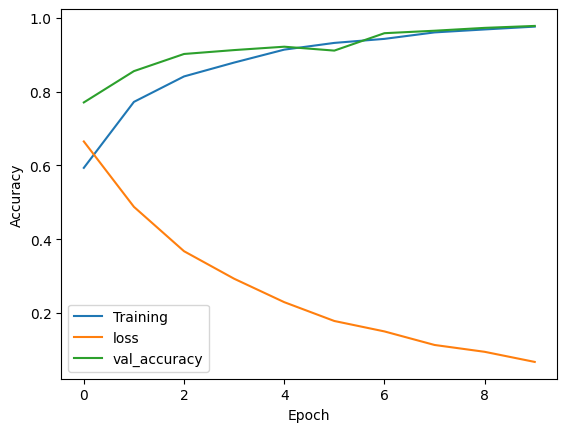

In [26]:
plt.plot(range(len(history.history['accuracy'])),
history.history['accuracy'],
label = 'Training')

plt.plot(range(len(history.history['loss'])),
history.history['loss'],
label = 'loss')

plt.plot(range(len(history.history['val_accuracy'])),
history.history['val_accuracy'],
label = 'val_accuracy')


plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [29]:
evo = model.evaluate(test_pad,label_testt)

88/88 [==============================] - 2s 24ms/step - loss: 0.0586 - accuracy: 0.9813


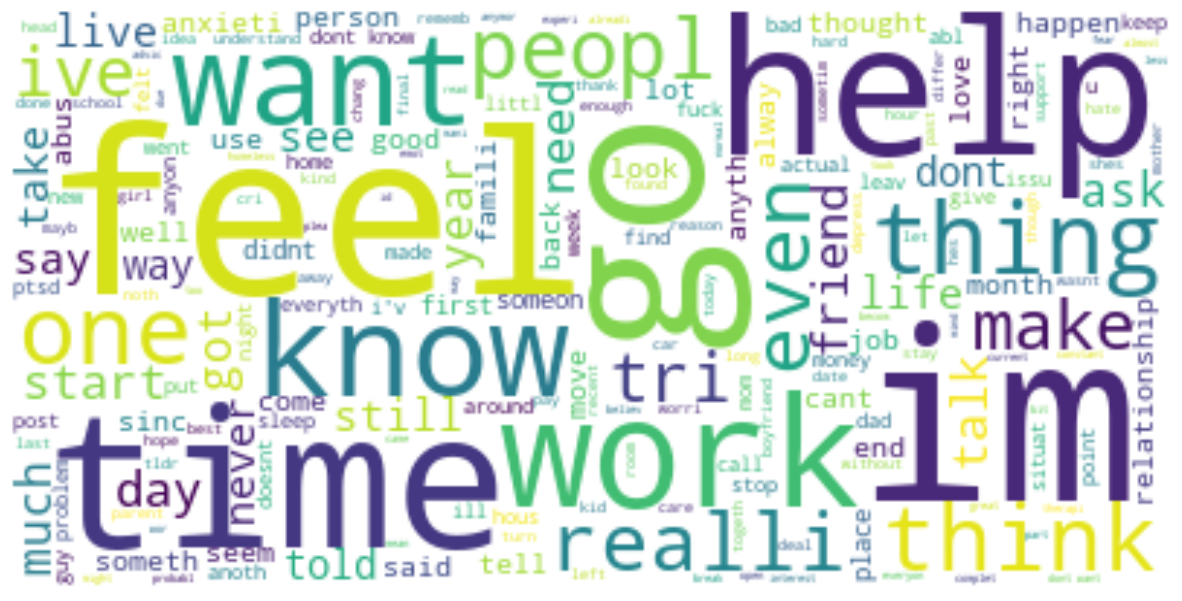

In [28]:
#Untuk menampilkan text yang banyak muncul
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
text = " ".join(i for i in data1.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()